In [156]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
import matplotlib.pyplot as plt

In [123]:
read_data = pd.read_csv("pnas.1713568115.sd01.txt")
read_data = read_data[read_data['trial'] == 1]  #take the data for the 1st trial only
data = read_data
data.head(10)
#print(len(data))
#type(data)

data['time'] = data['end'] - data['begin']#store the diff btw begin and end to get total time for each trans. in ms
data['time'] = data['time']/1000.0 #change ms to s
data['time'] = data['time'].map(lambda x: [x])

In [124]:
print(data)

        trial   id1   id2         begin           end      time
0           1   201   219  1.373105e+12  1.373105e+12     [2.0]
1           1   201   219  1.373109e+12  1.373109e+12    [42.0]
2           1   201   242  1.373119e+12  1.373119e+12     [2.0]
3           1   201   242  1.373119e+12  1.373119e+12   [2.999]
4           1   201   255  1.372958e+12  1.372958e+12  [41.999]
5           1   201   259  1.372937e+12  1.372937e+12    [15.0]
6           1   201   259  1.373041e+12  1.373041e+12     [3.0]
7           1   201   259  1.373240e+12  1.373240e+12     [8.0]
8           1   201   262  1.373360e+12  1.373360e+12  [27.999]
9           1   201   263  1.373178e+12  1.373178e+12     [2.0]
10          1   201   264  1.372993e+12  1.372993e+12     [3.0]
11          1   201   267  1.372978e+12  1.372978e+12     [2.0]
12          1   201   268  1.372873e+12  1.372873e+12     [5.0]
13          1   201   268  1.372993e+12  1.372993e+12     [3.0]
14          1   201   271  1.372988e+12 

In [125]:
id1_unique = data['id1'].unique()
id2_unique = data['id2'].unique()
len(id2_unique)

1159

In [126]:
df_new = data[:10]
print(df_new)

   trial  id1  id2         begin           end      time
0      1  201  219  1.373105e+12  1.373105e+12     [2.0]
1      1  201  219  1.373109e+12  1.373109e+12    [42.0]
2      1  201  242  1.373119e+12  1.373119e+12     [2.0]
3      1  201  242  1.373119e+12  1.373119e+12   [2.999]
4      1  201  255  1.372958e+12  1.372958e+12  [41.999]
5      1  201  259  1.372937e+12  1.372937e+12    [15.0]
6      1  201  259  1.373041e+12  1.373041e+12     [3.0]
7      1  201  259  1.373240e+12  1.373240e+12     [8.0]
8      1  201  262  1.373360e+12  1.373360e+12  [27.999]
9      1  201  263  1.373178e+12  1.373178e+12     [2.0]


In [127]:
data = data.groupby(['id1','id2']).agg({'time': 'sum'}) #group by id1 and id2 as nodes and time as a list of weights
data.head(100)

time
id1 id2                                                   
201 219                                        [2.0, 42.0]
    242                                       [2.0, 2.999]
    255                                           [41.999]
    259                                   [15.0, 3.0, 8.0]
    262                                           [27.999]
    263                                              [2.0]
    264                                              [3.0]
    267                                              [2.0]
    268                                         [5.0, 3.0]
    271                             [3.0, 13.0, 8.0, 13.0]
    272                                 [26.999, 2.0, 8.0]
    275                                        [12.0, 4.0]
    277                                              [3.0]
    279                                         [2.0, 2.0]
    280                                              [5.0]
    288                                           [10.999]
    289                                              [2.0]
    301                                         [2.0, 2.0]
    315                                   [18.0, 3.0, 2.0]
    332                                  [5.0, 7.999, 5.0]
    334                                             [19.0]
    335                                            [6.999]
    336                                         [2.0, 3.0]
    338                                              [2.0]
    340                                              [6.0]
    342                                       [4.0, 3.999]
    344                                              [2.0]
    347                                              [4.0]
    351                                              [2.0]
    355                                         [3.0, 5.0]
...                                                    ...
    495                                              [4.0]
    496                                              [4.0]
    498                                              [2.0]
    509                                              [4.0]
    511                                              [3.0]
    513                                         [7.0, 3.0]
    518                                              [2.0]
    520  [13.0, 2.0, 4.0, 2.0, 4.0, 4.0, 16.0, 10.0, 86...
    522                                              [6.0]
    549                                         [2.0, 2.0]
    555                                       [3.0, 9.999]
    556                              [3.0, 2.0, 4.0, 10.0]
    557                                    [7.0, 2.0, 2.0]
    564                                        [13.0, 2.0]
    567                                              [2.0]
    575                                              [2.0]
    576                                              [3.0]
    578                                             [10.0]
    594                                              [5.0]
    604                                              [4.0]
    608                                         [3.0, 3.0]
    613                                              [4.0]
    622                                              [3.0]
    623                                              [2.0]
    636                                              [2.0]
    637                                      [2.999, 26.0]
    639                             [42.0, 11.999, 18.999]
    640                                              [4.0]
    645                                              [3.0]
    647                                              [2.0]

[100 rows x 1 columns]

In [131]:
data = data.reset_index() #reset index after group by as there are some none values for column id1

In [132]:
data.head(10)

index  id1  id2                    time
0      0  201  219             [2.0, 42.0]
1      1  201  242            [2.0, 2.999]
2      2  201  255                [41.999]
3      3  201  259        [15.0, 3.0, 8.0]
4      4  201  262                [27.999]
5      5  201  263                   [2.0]
6      6  201  264                   [3.0]
7      7  201  267                   [2.0]
8      8  201  268              [5.0, 3.0]
9      9  201  271  [3.0, 13.0, 8.0, 13.0]

In [146]:
G = nx.Graph() #initialize the graph
for index, row in data.iterrows():
    G.add_edge(row[1],row[2], weight = row[3]) #add node1,node2,weight list iteratively to the graph
    


In [197]:
#print(G.edges)
nodes = list(G.nodes)
len(set(nodes)) #number of unique nodes

1164

In [ ]:
l = list(G.edges)
len(set(l)) #number of unique edges

In [177]:
print(len(G.edges))

200723


In [191]:
e = [(u, v) for (u, v, d) in G.edges(data=True)][:5000] #do it for 5000 edges as there are too many edges
pos = nx.random_layout(G)  #positions for all nodes



In [184]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (56, 28))
# Font size to 14
matplotlib.rc('font', size = 14)
# Add grid lines
matplotlib.rc('axes', grid = True)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

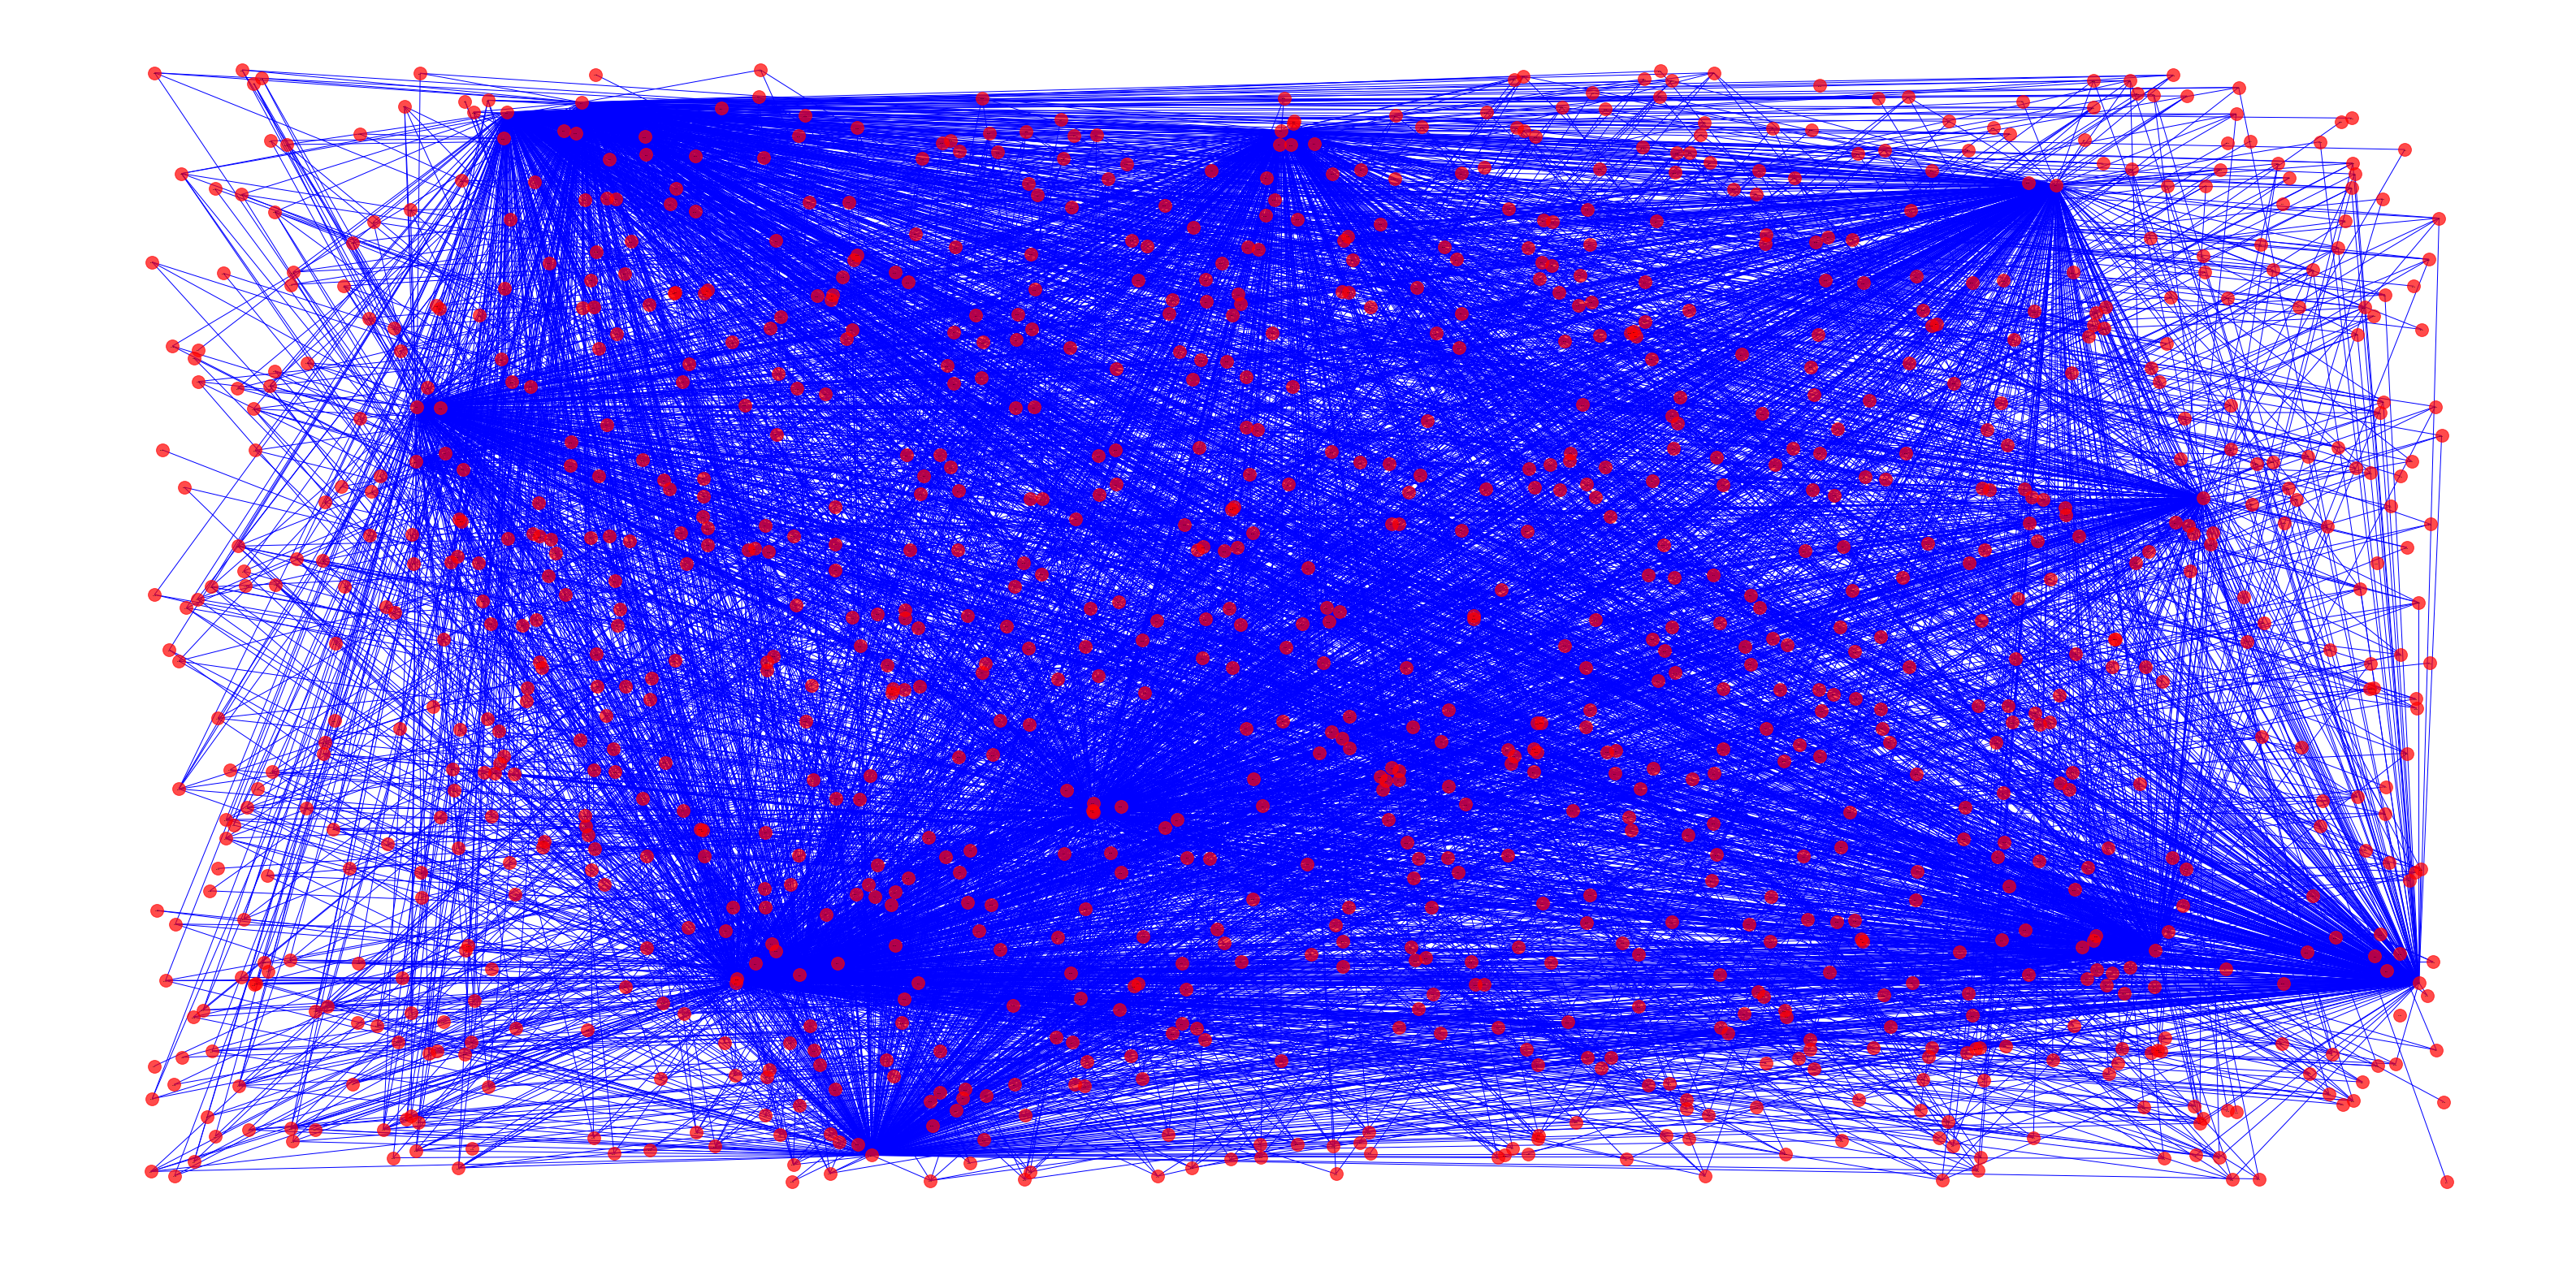

In [199]:
# nodes
nx.draw_networkx_nodes(G,pos,node_size=250, alpha=0.7, with_labels=False, edge_color='0.4')

# edges
nx.draw_networkx_edges(G, pos, edgelist=e,edge_color='b',
                       width=1)
# labels
nx.draw_networkx_labels(G, pos, font_size=2, font_family='sans-serif')

plt.axis('off')
plt.show()